In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
from scipy.optimize import curve_fit

data_folder = 'Data'
file_paths = glob.glob(f'{data_folder}/*')

def wavelength_key(path):
    filename = os.path.basename(path)
    return int(filename.split('nm')[0])
    
peak_roi = {
    450: (46,53),
    500: (44,50),
    550: (44,49),
    600: (44,48),
    650: (44,48),
    700: (44,47),
    750: (44,47),
    800: (44,46),
    850: (44,46),
    900: (44,46),
    950: (44,46),
    1000: (44,46)
}

def lorentz_linear(x, a, x0, gamma, b, c):
    return a / (1 + ((x - x0) / gamma) ** 2) + b * x + c

wavelengths = []
x0_vals = []
for path in sorted(file_paths, key=wavelength_key):
    data = np.loadtxt(path)
    alpha, voltages = data[:, 0], data[:, 1]
    mask = (alpha >= 40) & (alpha <= 55)
    alpha = alpha[mask]
    voltages = voltages[mask]
    filename = os.path.basename(path)

    wavelength = wavelength_key(path)
    if wavelength not in peak_roi:
        continue

    roi_min, roi_max = peak_roi[wavelength]
    mask = (alpha >= roi_min) & (alpha <= roi_max)
    x_fit = alpha[mask]
    y_fit = voltages[mask]

    if len(x_fit) < 5:
        continue

    a_init = -5
    x0_init = x_fit[np.argmin(y_fit)]
    gamma_init = 1
    b_init = 0
    c_init = np.median(y_fit)

    popt, _ = curve_fit(lorentz_linear, x_fit, y_fit, p0=[a_init, x0_init, gamma_init, b_init, c_init])
    x0_vals.append(popt[1])
    wavelengths.append(wavelength)

    x_plot = np.linspace(min(x_fit), max(x_fit), 300)
    y_plot = lorentz_linear(x_plot, *popt)

    plt.figure()
    plt.scatter(alpha, voltages, label='Data', marker='x')
    plt.plot(x_plot, y_plot, label='Lorentz + Linear Fit', color='r')
    plt.title(rf"$\lambda={wavelength}$nm absorption data")
    plt.xlabel(r'$\alpha$ (°)')
    plt.ylabel('Voltage (mV)')
    plt.grid(True)
    plt.legend()
    plt.show()


Text(0.5, 0, '$k_{\\text{Oberflächenplasmon}} (\\text{m}^{-1})$')

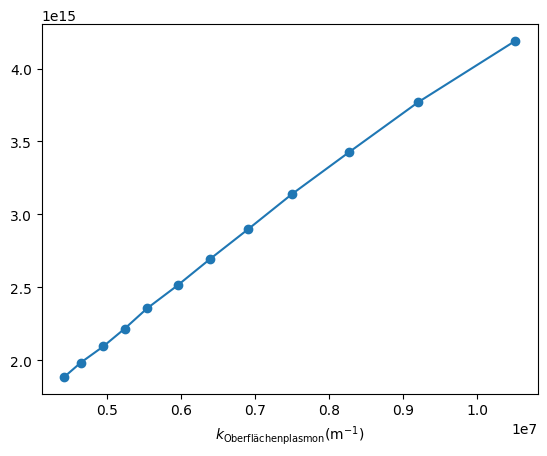

In [42]:
# Wave numbers
alpha = np.array(x0_vals)
wavelength = np.array(wavelengths) * 1e-9  # Convert nm to meters
k = 2 * np.pi / wavelength
omega = k * 3e8
k_oberfl = k * np.sin(np.radians(alpha))

plt.figure()
plt.plot(k_oberfl, omega, marker='o')
plt.xlabel(r'$k_{\text{Oberflächenplasmon}} (\text{m}^{-1})$')